Первая лабораторная работа

In [1]:
import thinkdsp as td

Был произведён импорт самого модуля для работы с сигналами.
Импортируем звук игры на духовом инструменте и выделим небольшую часть, в которой высота примерно постоянна

In [2]:
filename = "23193__kaponja__10trump.wav"
wave = td.read_wave(filename)
wave.make_audio()

In [3]:
start = 3.5
duration = 0.5
segment = wave.segment(start, duration)
segment.make_audio()

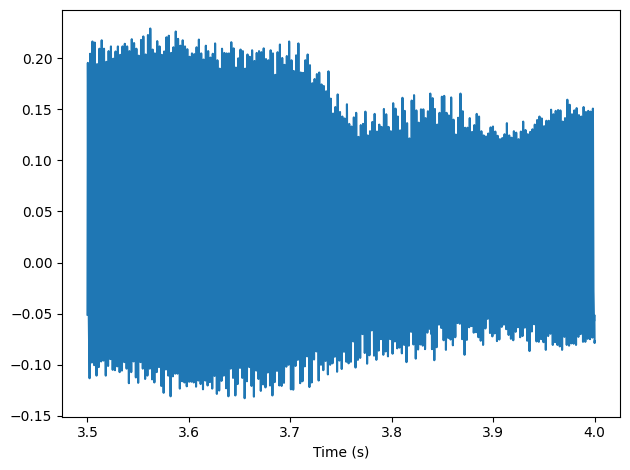

In [4]:
segment.plot()
td.decorate(xlabel='Time (s)')

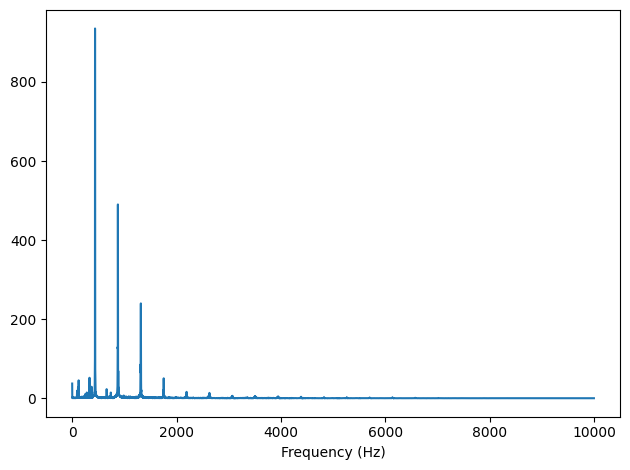

In [5]:
spectrum = segment.make_spectrum()
spectrum.plot(high = 10000)
td.decorate(xlabel = "Frequency (Hz)")

Отфильтруем полученный спектр и обратим его в формат Wave, чтобы послушать новую запись 

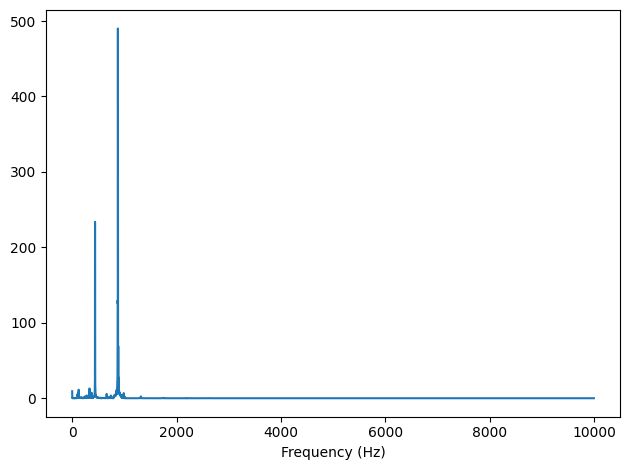

In [10]:
spectrum.low_pass(1000, 0.1)
spectrum.high_pass(800, 0.5)

spectrum.plot(high=10000)
td.decorate(xlabel='Frequency (Hz)')

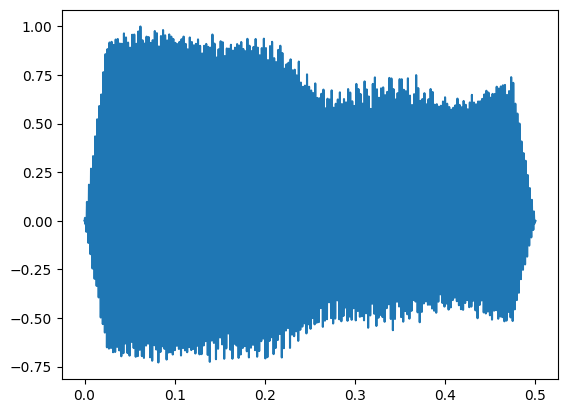

In [8]:
filtered = spectrum.make_wave()
filtered.normalize()
filtered.apodize()
filtered.plot()
filtered.make_audio()

Звук получился более приглушённым и постоянным по громкости

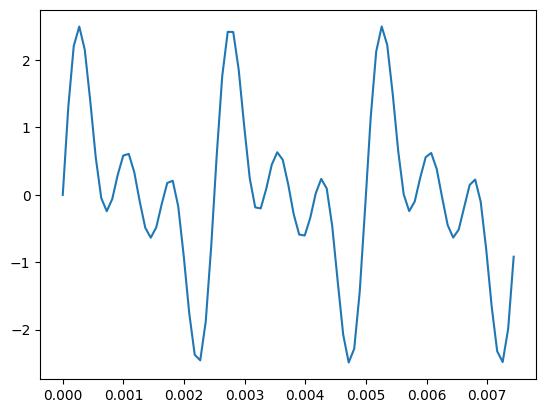

In [12]:
comp_sig = td.SinSignal(freq=400, amp=1.0) + td.SinSignal(freq=800, amp=1.0) + td.SinSignal(freq=1200, amp=1.0)
comp_sig.plot()

In [13]:
comp_sig.make_wave().make_audio()

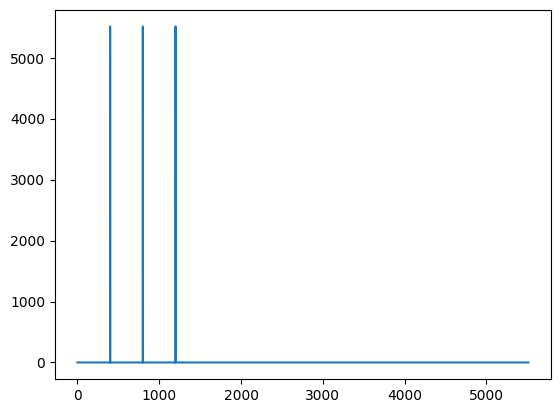

In [14]:
comp_spectrum = comp_sig.make_wave().make_spectrum()
comp_spectrum.plot()

При добавлении ещё одного компонента с частотой, не кратной 400, его можно услышать на фоне 

In [15]:
comp_sig += td.SinSignal(freq=1350, amp=2.0)
comp_sig.make_wave().make_audio()

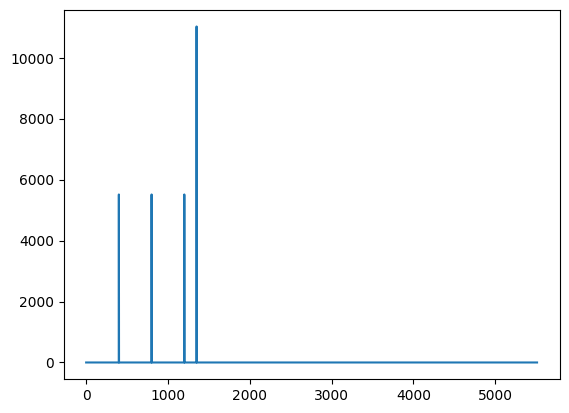

In [16]:
comp_spectrum = comp_sig.make_wave().make_spectrum()
comp_spectrum.plot()

Напишем и протестируем функцию ускорения или замедления записи звука на примере первого файла

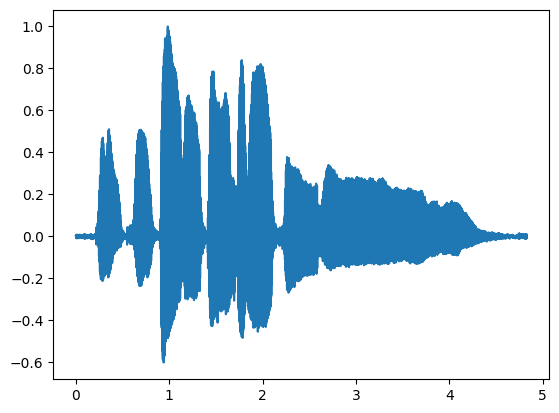

In [207]:
filename = "23193__kaponja__10trump.wav"
wave = td.read_wave(filename)
wave.plot()

In [208]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

In [209]:
stretch(wave, 0.5)
wave.make_audio()

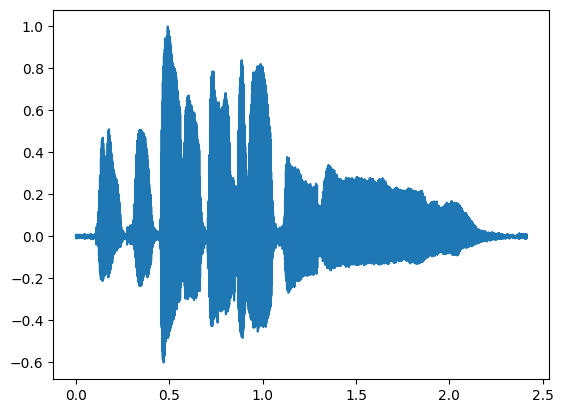

In [210]:
wave.plot()